In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('Airline_customer_satisfaction.csv')

In [3]:
data

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [5]:
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [6]:
data.tail()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,...,3,4,5,5,5,3,3,3,185,186.0


In [7]:
data.isna()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129878,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [10]:
data['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [11]:
data['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [12]:
data['Age'].unique()

array([65, 47, 15, 60, 70, 30, 66, 10, 56, 22, 58, 34, 62, 35, 13, 52, 55,
       28,  9, 25, 53, 16, 64, 42, 21, 20, 26, 48, 57, 31, 17, 33, 32, 38,
       29, 24, 37,  7, 39, 11, 49,  8, 40, 45, 67, 59, 44, 69, 51, 18, 23,
       12, 46, 41, 54, 27, 63, 61, 36, 50, 68, 19, 14, 43, 72, 71, 80, 77,
       85, 78, 75, 79, 74, 73, 76], dtype=int64)

In [13]:
data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [14]:
data.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
data=data.drop(['Customer Type','Type of Travel'],axis=1)

In [16]:
data.columns

Index(['satisfaction', 'Age', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [17]:
avg=data['Arrival Delay in Minutes'].mean()

In [18]:
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].fillna(avg)

In [19]:
data.isna().sum()

satisfaction                         0
Age                                  0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [20]:
data.dtypes

satisfaction                          object
Age                                    int64
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: object

In [21]:
le=LabelEncoder()

In [22]:
data['satisfaction']=le.fit_transform(data['satisfaction'])

In [23]:
data['Class']=le.fit_transform(data['Class'])

In [24]:
data['Arrival Delay in Minutes']=le.fit_transform(data['Arrival Delay in Minutes'])

In [25]:
data.dtypes

satisfaction                         int32
Age                                  int64
Class                                int32
Flight Distance                      int64
Seat comfort                         int64
Departure/Arrival time convenient    int64
Food and drink                       int64
Gate location                        int64
Inflight wifi service                int64
Inflight entertainment               int64
Online support                       int64
Ease of Online booking               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Cleanliness                          int64
Online boarding                      int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int64
dtype: object

In [26]:
data

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0
1,1,47,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,306
2,1,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0
3,1,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0
4,1,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,1,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0
129876,0,63,0,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,173
129877,0,69,1,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,164
129878,0,66,1,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,206


Text(0, 0.5, 'class')

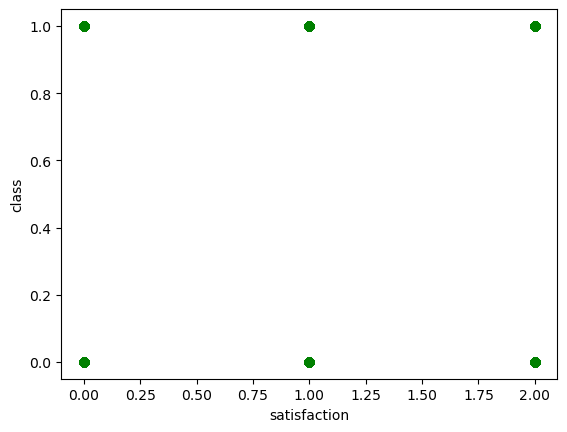

In [27]:
plt.scatter(data['Class'],data['satisfaction'],color="green")
plt.xlabel("satisfaction")
plt.ylabel("class")

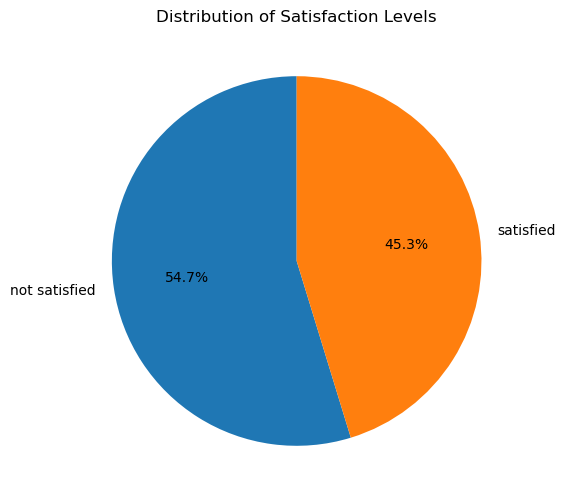

In [28]:
target_counts = data['satisfaction'].value_counts()
labels = ['not satisfied', 'satisfied']
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Satisfaction Levels")
plt.show()


In [29]:
y=data['satisfaction']

In [30]:
x=data.drop('satisfaction',axis=1)

In [31]:
x

,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0
1,47,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,306
2,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0
3,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0
4,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0
129876,63,0,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,173
129877,69,1,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,164
129878,66,1,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,206


In [32]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int32

In [33]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

In [34]:
subset_size = 10000
X_subset = x[:subset_size]
y_subset = y[:subset_size]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_score = cross_val_score(LogisticRegression(), X_subset, y_subset, cv=cv, n_jobs=-1)
rf_score = cross_val_score(RandomForestClassifier(random_state=43), X_subset, y_subset, cv=cv, n_jobs=-1)
sv_score = cross_val_score(SVC(), X_subset, y_subset, cv=cv, n_jobs=-1)

print("Logistic Regression Scores:", log_score)
print("Random Forest Scores:", rf_score)
print("SVM Scores:", sv_score)



Logistic Regression Scores: [0.798  0.8235 0.8105 0.8075 0.809 ]
Random Forest Scores: [0.995  0.997  0.9955 0.996  0.995 ]
SVM Scores: [0.6255 0.6395 0.644  0.6195 0.643 ]


In [35]:
import numpy as np
print(np.mean(log_score))
print(np.mean(rf_score))
print(np.mean(sv_score))



0.8097000000000001
0.9956999999999999
0.6343


In [36]:
from sklearn.model_selection import GridSearchCV

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [5, 10, 15, 20, 30, 40, 50],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9]
}

rf = RandomForestClassifier()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)  
gs.fit(X_subset, y_subset)
print("Best Parameters:", gs.best_params_)
print("Best Score:", gs.best_score_)


Best Parameters: {'max_depth': 9, 'n_estimators': 40}
Best Score: 0.9056


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=.20)

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=9, n_estimators=40, random_state=70)
model.fit(x_train, y_train)
print("Training Accuracy:", model.score(x_train, y_train))
print("Test Accuracy:", model.score(x_test, y_test))


Training Accuracy: 0.9185979365568216
Test Accuracy: 0.9159993840468125


In [71]:
y_pred=model.predict(x_test)
pd.DataFrame({"true value":y_test,"predicted value":y_pred})

,true value,predicted value
40075,1,1
9734,1,0
95482,1,1
96843,1,1
94178,1,1
...,...,...
92836,1,1
85426,0,0
75407,0,0
518,1,1


In [72]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [73]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10493,  1234],
       [  948, 13301]], dtype=int64)

<Axes: >

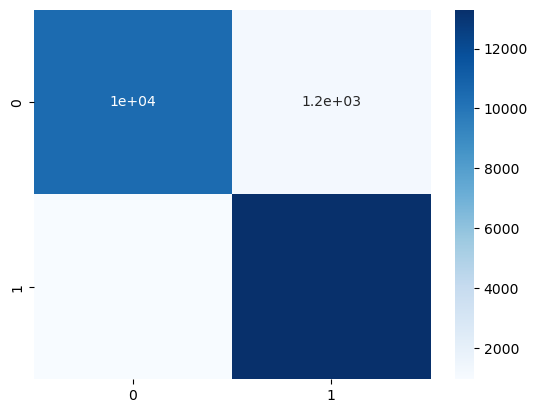

In [74]:
sns.heatmap(cm,annot=True,cmap="Blues")